In [107]:
import tweepy
import csv
import json
import pandas as pd

In [108]:
# create a dictionary to store your twitter credentials

twitter_cred = dict()

# Enter your own consumer_key, consumer_secret, access_key and access_secret
# Replacing the stars ("********")

twitter_cred['CONSUMER_KEY'] = '****'
twitter_cred['CONSUMER_SECRET'] = '*****'
twitter_cred['ACCESS_KEY'] = '*****'
twitter_cred['ACCESS_SECRET'] = '****'

# Save the information to a json so that it can be reused in code without exposing
# the secret info to public

with open('twitter_credentials.json', 'w') as secret_info:
    json.dump(twitter_cred, secret_info, indent=4, sort_keys=True)

In [ ]:
# Twitter API credentials

with open('twitter_credentials.json') as cred_data:
    info = json.load(cred_data)
    consumer_key = info['CONSUMER_KEY']
    consumer_secret = info['CONSUMER_SECRET']
    access_key = info['ACCESS_KEY']
    access_secret = info['ACCESS_SECRET']


In [ ]:
# Create the api endpoint

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [ ]:
limit = 4000
query=['Texas','Senate']
tweets_list = []
# for tweet in tweepy.Cursor(api.search, q=query).items(limit):
#     tweets_list.append(tweet)
for tweet in tweepy.Cursor(api.search,q=query,since='2018-10-16',until='2018-10-23').items(limit):
    tweets_list.append(tweet)
#fetched_tweets = tweepy.Cursor(api.search, q=query).items(limit)

In [ ]:
#Debatefetched_tweets

In [ ]:
len(tweets_list)

In [ ]:
def populate_tweet_df(tweets):
#Create an empty dataframe
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['text'] = list(map(lambda tweet: tweet.text, tweets))
    df['retweeted'] = list(map(lambda tweet: tweet.retweeted, tweets))
    df['place'] = list(map(lambda tweet: tweet.user.location, tweets))
    df['screen_name'] = list(map(lambda tweet: tweet.user.screen_name,tweets))
    df['verified_user'] = list(map(lambda tweet: tweet.user.verified,tweets))
    df['followers_count'] = list(map(lambda tweet: tweet.user.followers_count, tweets))
    df['friends_count'] = list(map(lambda tweet: tweet.user.friends_count,tweets))
   # df['friendship_coeff'] = list(map(lambda tweet: float(tweet.user.followers_count)/float(tweet.user.friends_count), tweets))
    return df


In [ ]:
df = populate_tweet_df(tweets_list)
print (df.head(10))

In [ ]:
df.to_csv('twitter_tweets_Anuja.csv', sep='\t', encoding='utf-8')


In [ ]:
#!pip install pillow

In [3]:
twitterdata = pd.read_csv('twitter_tweets_latest1.csv',sep='\t',encoding='utf-8')
d = pd.read_csv('twitter_tweets_latest2.csv',sep='\t',encoding='utf-8')
#latest = pd.read_csv('twitter_tweets_latest.csv',sep='\t',encoding='utf-8')
finalcsv = pd.concat([twitterdata,d],ignore_index=True)
#finalcsv = pd.concat([tempcsv,latest],ignore_index=True)
finalcsv.describe()


,Unnamed: 0,id,followers_count,friends_count
count,4817.000000,4.817000e+03,4.817000e+03,4817.000000
mean,1729.569442,1.054038e+18,1.614478e+04,4177.156529
std,1213.944771,1.072595e+15,2.978958e+05,11732.583764
min,0.000000,1.051277e+18,0.000000e+00,0.000000
25%,602.000000,1.054521e+18,2.450000e+02,336.000000
50%,1591.000000,1.054522e+18,9.820000e+02,1166.000000
75%,2795.000000,1.054522e+18,3.897000e+03,4635.000000
max,3999.000000,1.054523e+18,1.820139e+07,424000.000000


# Lift Calculation

In [4]:
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")

%matplotlib inline

#tweets = pd.read_csv('twitter_tweets.csv')

In [5]:
tweets = finalcsv
#tweets = df

In [6]:
tweets['full_text'][1]

'RT @Sunni_Tzu: The side that has both superiors and subordinates united in singular purpose will take the victory.\n\n#SunTzu https://t.co/VT…'

In [ ]:
#Preprocessing del RT @blablabla:
tweets['tweetos'] = '' 

#add tweetos first part
for i in range(len(tweets['full_text'])):
    try:
        tweets['tweetos'][i] = tweets['full_text'].str.split(' ')[i][0]
    except AttributeError:    
        tweets['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(tweets['full_text'])):
    if tweets['tweetos'].str.contains('@')[i]  == False:
        tweets['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(tweets['full_text'])):
    tweets['full_text'][i] = " ".join([word for word in tweets['full_text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


tweets['full_text'][1]

In [7]:
tweets['full_text'] = tweets['full_text'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
tweets['full_text'] = tweets['full_text'].apply(lambda x: re.sub('  ', ' ', x))
tweets['full_text'][1]

'rt sunni_tzu the side that has both superiors and subordinates united in singular purpose will take the victory\n\nsuntzu https//tco/vt…'

In [8]:
#convert it to lower
text_list = tweets["full_text"].tolist()
text_lower = [element.lower() for element in text_list]



In [9]:
tweets['full_text'] = pd.Series(text_lower).values


In [10]:
tweets.head()

,Unnamed: 0,id,full_text,retweeted,place,screen_name,verified_user,followers_count,friends_count
0,0,1054522790374662145,cnn 10 22 2018 18 33 16 trump's dangerous cara...,False,Okanagan B.C. Canada,Monte_Alto,False,5844,6375
1,1,1054522790336978944,rt sunni_tzu the side that has both superiors ...,False,NaN,sandy_bluewave,False,236,564
2,2,1054522789644902400,rt fuctupmind ted cruz and donald trump live i...,False,NaN,colive2,False,793,1127
3,3,1054522789078728709,huge crowd outside realdonaldtrump rally in ho...,False,NaN,rodgersma83,False,926,2002
4,4,1054522788172718080,vote beto o’rourke for all texans cruz cotes a...,False,"Tennessee, USA",Deborah15503274,False,190,887


In [11]:
tweets.head()

,Unnamed: 0,id,full_text,retweeted,place,screen_name,verified_user,followers_count,friends_count
0,0,1054522790374662145,cnn 10 22 2018 18 33 16 trump's dangerous cara...,False,Okanagan B.C. Canada,Monte_Alto,False,5844,6375
1,1,1054522790336978944,rt sunni_tzu the side that has both superiors ...,False,NaN,sandy_bluewave,False,236,564
2,2,1054522789644902400,rt fuctupmind ted cruz and donald trump live i...,False,NaN,colive2,False,793,1127
3,3,1054522789078728709,huge crowd outside realdonaldtrump rally in ho...,False,NaN,rodgersma83,False,926,2002
4,4,1054522788172718080,vote beto o’rourke for all texans cruz cotes a...,False,"Tennessee, USA",Deborah15503274,False,190,887


In [12]:

tweets['full_text'] = tweets['full_text'].str.replace(r'[^\w\s]+', '')



In [109]:
dict_names = {}


dict_names.update( {'beto' : ['beto','orourke','betofortexas','votebetofortexas','votewithbeto','betofortexasrt','orourkes','betort','betoforsenate','votewithbetort','remotebeto','votebeto','racebeto','beto4trt','betoforsenatert','teambeto','votebetort','orourkert','vetobeto','teambetort','betoorourke','betofortx','linorourke','orourkealthough','orourkeearly','orourkecool','betocruz','orourketed','orourketexas']})
dict_names.update( {'crime' : ['fraud','safety','news','lieutenant','bitter','speeding','footage','patriots','arrested','criminal','attacks']})
dict_names.update( {'cruz' :['cruz', 'Ted', 'choosecruz', 'cruzrt', 'tedrt','cruzs', 'tedcruz', 'cruzcrew', 'trumpcruz', 'sencruz', 'cruzcrewrt', 'tedcruzrt', 'tedtexas', 'texascruz', 'texasted', 'firecruz', 'cruzzzzzzzzz', 'votetedcrz', 'cruzampaposs', 'cruztovictoryrt', 'tedcruzrally', 'votetedcruz', 'cruzted', 'votedrt', 'teddlhuhley', 'wted', 'cruzlots', 'cruzrtrt', 'trumpstrumpcruz', 'cruzreally', 'tedcruz2018', 'cruz4texasim']})
dict_names.update( {'development' : ['build','nationwide','economy','floodwaters','city','challenging','working','cities','district']})
dict_names.update( {'jobs' : ['jobs','industry','fundraising','wall','share','booming','boom','unemployment','money','university','fired','running','accomplished','coverage','interviews','tech']})
dict_names.update( {'social' : ['people', 'live', 'wife', 'crowd', 'millions', 'million', 'huge', 'family', 'woman', 'kids', 'families', 'father', 'women']})
dict_names.update( {'law' : ['gov', 'legislation', 'abolish', 'law', 'policies', 'government']})
dict_names.update( {'state affairs' : ['border','oil','latino','freedom','defend','departing','florida','county','borders','usmexico','states','country','dallas','arizona','russia','neighbors','california','latinos']})
dict_names.update( {'tax' : ['tax','taxes','regulation','taxpaying','taxpayersfire','goptaxscam','taxraised','taxrt','taxcuts','raintax']})


In [110]:
for x in dict_names.items():
    for y in x[1]:
        tweets['full_text']  = tweets['full_text'].str.replace(str(y) , str(x[0]))

## Summary till this point:

Till now, we scraped about 8000 tweets and did the following:
* Preprocessing of code (removing stopwords, punctuations and converting all the tweets text into small letters )
* In the tweetes that we got, we analysed it and replaced the eords to their respective related words

Although this was not asked, but to analyze the occurrence of different issues we plotted the word cloud.

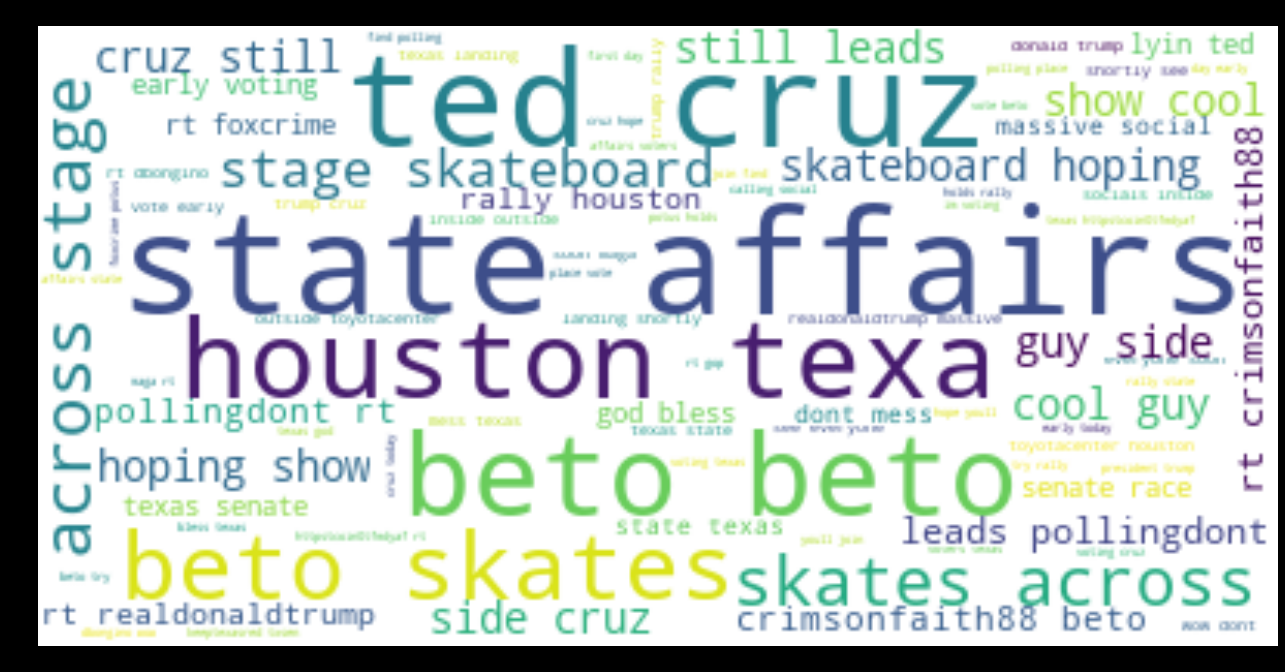

In [111]:
##########Extra############
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2018).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Texas Senate Race")
wordcloud(tweets,'full_text')

In [112]:
df_tokenizer = tweets

In [113]:
import nltk
from nltk.tokenize import sent_tokenize

text_list = df_tokenizer["full_text"].tolist()
for text in text_list:
    sent_tokenize_list = sent_tokenize(text)
    print(sent_tokenize_list)

['cnn 10 22 2018 18 33 16 trumps dangerous caravan terrorists 11000 miles texas even wearing nike gear could become threat us state affairs time near distant future stfuah httpstcobjksvvxzcg via youtube']
['vote beto beto texans cruz cotes cruz lies trump lies voting democrats patriotic choice 2018 vote beto beto httpstcooovqdjzfh4']
['danacheuka mkraju cool beans everybody texas dana said theyd welcome healthcare education welfare programs heck wages dropbecause feeeeelz dana could post addresswant make sure theyre desocialred right house']
['wow thank houston texas state affairs andrews_efb see hours mega']
['rt bigleaguepol texas social crime voter crime third time twice two weeks httpstcobgmunobqxp']
['rt dbongino wow dont mess texas httpstcoin0tfmdyaf']
['rt edkrassen jobs absurdly long line early voting harris state affairs texas morning hillary clinton state affairs']
['god bless texas']
['rt petehegseth tonight outside amp inside realdonaldtrump maga rally houston texas dont mi

['im voting cruz hope youll join find polling place vote early today httpstcokxxkcwkoim cruz keeptexasred txsen']
['great social texas sending message rest nation theres mighty red wave acoming']
['rt realdonaldtrump massive socials inside outside toyotacenter houston texas landing shortly see everyone soon maga']
['want play bigger game go time plug guys ill make ya proud fbr party increase numbers join fbrparty followbackresistance follow back please 1 like 2 retweet 3 follow 4 reply fbr bluewave resist']
['rt foxcrime cruz social jobs state texas depend vibrant state affairs gas jobs energy']
['rt hburgdems motivationmonday need remember bluewave needs us part lets turn tide elect']
['rt mitchellvii gopaffiliated voters surpassed democraticaffiliated ones early voting state affairs state affairs georgia indiana mon']
['rt foxcrime potus cruz hes lyin ted anymore hes beautiful ted call texas ted httpstcofavw']
['rt dbongino wow dont mess texas httpstcoin0tfmdyaf']
['rt trumpateam wat

['2 2 remnants willa set large portion texas rain midweek 1 3 expected brazos valley rain gauges thursday morning latest know tonight httpstcocc2ihjtzzz']
['rt nathaniroberts see state affairs turn away jesus said whatever thousands guatemala']
['rt anthemrespect else could would better houston texas trump rally 630 going']
['texas sky pink right im love']
['rt amandaleehouse cruz amp realdonaldtrump social houston texas tune breitbartcrimes facebook httpstco0vxoyis11v']
['rt chriskrokshow nice beto shirt earlyvotetx dont forget carrying maga rally social wbap247crime starting 630p']
['rt demwrite watch rt post amp jobs hell video doesnt pump nothing epic bluewave httpstcos']
['orblueduck click bait headline misleading got beto']
['texas gave amazing blessing also little broken heart always onwards']
['rt sandratxas beto beto open state affairss law ice candidate crime texas priority vote ted cruz']
['rt unconquerable go bluewave jacky rosen rosenfornevada flipthesenate control congres

['rt crimsonfaith88 beto skates across stage skateboard hoping show cool guy side cruz still leads pollingdont']
['rt crimsonfaith88 beto skates across stage skateboard hoping show cool guy side cruz still leads pollingdont']
['rt crimsonfaith88 beto skates across stage skateboard hoping show cool guy side cruz still leads pollingdont']
['rt crimsonfaith88 beto skates across stage skateboard hoping show cool guy side cruz still leads pollingdont']
['rt crimsonfaith88 beto skates across stage skateboard hoping show cool guy side cruz still leads pollingdont']
['rt crimsonfaith88 beto skates across stage skateboard hoping show cool guy side cruz still leads pollingdont']
['rt crimsonfaith88 beto skates across stage skateboard hoping show cool guy side cruz still leads pollingdont']
['rt crimsonfaith88 beto skates across stage skateboard hoping show cool guy side cruz still leads pollingdont']
['rt crimsonfaith88 beto skates across stage skateboard hoping show cool guy side cruz still lea

In [114]:
#word tokenizer
work_tokenize_list =[]
from nltk.tokenize import word_tokenize
for text in text_list:
     work_tokenize_list.append(word_tokenize(text))
type(work_tokenize_list)

list

In [115]:
from nltk.corpus import stopwords
def remove_stopwords(x=[], lang='english'):
    words = nltk.word_tokenize(text)
    lang_stopwords = stopwords.words(lang)
    stopwords_removed = [w for w in words if w.lower() not in lang_stopwords]
    return " ".join(stopwords_removed)

In [116]:
# # from string import punctuation
# def unique_words(s):
# # Remove punctuation & others, convert to lower and finally stopwords
#     s=str(s)
#     for p in punctuation:
#         s =s.replace(p,'')
#     s=s.lower()
#     return list(set(re.findall('\w+',s)))

# tweets['unique_words_list']=tweets['text'].map(unique_words)


In [117]:
remove_stopwords(work_tokenize_list)


'rt texastribune fiftyfour percent texans backed ted cruz 45 percent backed beto beto latest quinnipiac jobs p'

In [118]:
# stemmer=nltk.PorterStemmer()
# df_tokenizer["text_new"] = list(map(lambda str: stemmer.stem(str.lower()), df_tokenizer["text"]))
# df_tokenizer['text_new']
 
stop_words_list=[]

for text in (text_list):
    x=remove_stopwords(text)
    stop_words_list.append(x)

In [119]:
stop_words_list
# #df_tokenizer['text_new']=df_tokenizer['text_new'].map(joining)
# a=df_tokenizer['text_new']
# b = set(a)
# type(b)

['cnn 10 22 2018 18 33 16 trumps dangerous caravan terrorists 11000 miles texas even wearing nike gear could become threat us state affairs time near distant future stfuah httpstcobjksvvxzcg via youtube',
 'vote beto beto texans cruz cotes cruz lies trump lies voting democrats patriotic choice 2018 vote beto beto httpstcooovqdjzfh4',
 'danacheuka mkraju cool beans everybody texas dana said theyd welcome healthcare education welfare programs heck wages dropbecause feeeeelz dana could post addresswant make sure theyre desocialred right house',
 'wow thank houston texas state affairs andrews_efb see hours mega',
 'rt bigleaguepol texas social crime voter crime third time twice two weeks httpstcobgmunobqxp',
 'rt dbongino wow dont mess texas httpstcoin0tfmdyaf',
 'rt edkrassen jobs absurdly long line early voting harris state affairs texas morning hillary clinton state affairs',
 'god bless texas',
 'rt petehegseth tonight outside amp inside realdonaldtrump maga rally houston texas dont mi

In [120]:
df_tokenizer['full_text'] = pd.Series(stop_words_list).values
tweet_list = list(pd.Series(stop_words_list).values)
print(tweet_list[0])

cnn 10 22 2018 18 33 16 trumps dangerous caravan terrorists 11000 miles texas even wearing nike gear could become threat us state affairs time near distant future stfuah httpstcobjksvvxzcg via youtube


In [121]:
sumn=df_tokenizer['full_text'].sum()
listword = sumn.split()

a = [x for x in listword if len(x) > 2]
print (a)
    
# aText = ', '.join(str(s) for s in b)
# aText

['cnn', '2018', 'trumps', 'dangerous', 'caravan', 'terrorists', '11000', 'miles', 'texas', 'even', 'wearing', 'nike', 'gear', 'could', 'become', 'threat', 'state', 'affairs', 'time', 'near', 'distant', 'future', 'stfuah', 'httpstcobjksvvxzcg', 'via', 'youtubevote', 'beto', 'beto', 'texans', 'cruz', 'cotes', 'cruz', 'lies', 'trump', 'lies', 'voting', 'democrats', 'patriotic', 'choice', '2018', 'vote', 'beto', 'beto', 'httpstcooovqdjzfh4danacheuka', 'mkraju', 'cool', 'beans', 'everybody', 'texas', 'dana', 'said', 'theyd', 'welcome', 'healthcare', 'education', 'welfare', 'programs', 'heck', 'wages', 'dropbecause', 'feeeeelz', 'dana', 'could', 'post', 'addresswant', 'make', 'sure', 'theyre', 'desocialred', 'right', 'housewow', 'thank', 'houston', 'texas', 'state', 'affairs', 'andrews_efb', 'see', 'hours', 'megart', 'bigleaguepol', 'texas', 'social', 'crime', 'voter', 'crime', 'third', 'time', 'twice', 'two', 'weeks', 'httpstcobgmunobqxprt', 'dbongino', 'wow', 'dont', 'mess', 'texas', 'http

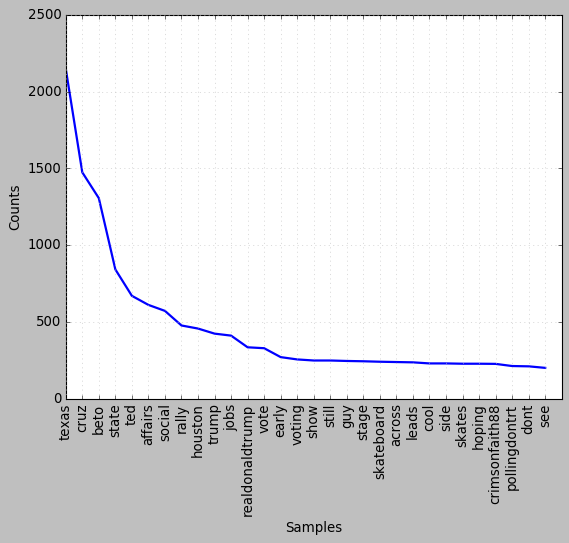

In [122]:
count = nltk.FreqDist(a)
count.plot(30)


In [124]:
df_word = pd.DataFrame(columns=['Word','Frequency'])
a=0
b=0
for j in count.keys():
    df_word.loc[a, ['Word']] = j
    a=a+1
for k in count.values():
    df_word.loc[b,['Frequency']] = k
    b=b+1
x = df_word.sort_values(by=['Frequency'],ascending = False)
x

,Word,Frequency
8,texas,2149
28,cruz,1474
26,beto,1306
16,state,842
123,ted,670
17,affairs,611
69,social,572
102,rally,477
63,houston,457
31,trump,424


## Summary till this point:

To plot the frequency if each word with its count we did the following:

* Tokenized the text
* Removed the stop words
* Counted the frequency agaist each word

As expected, we found that the frequency distribution followed the 1/n rule.

In [126]:
# sumn=df_tokenizer['text_new'].sum()
# sumn
x.to_csv('analysis_Anuja.csv', sep='\t', encoding='utf-8')

# finding the frequency distribution for candidates and issues found above

In [128]:
namesdict = {}
issuedict = {}
issues = ['crime','tax','jobs','law']
names =['beto','cruz']
if 'beto' or 'cruz' in count.keys():
    namesdict['beto'] = count['beto']
    namesdict['cruz'] = count['cruz']

for issue in issues:
    if issue in count.keys():
        issuedict[issue]= count[issue]
print(issuedict)        




{'crime': 157, 'tax': 41, 'jobs': 411, 'law': 103}


# find pair combination

In [129]:

valuecomb = {}

In [130]:

tweet_for_lift = {}
def pair_comb(names,issues,tweet_list):
    
    for i in names:
        
        for j in issues:
            listtweet = []
            freq=0
            for k in tweet_list:
                if i in k and j in k:
                    freq= freq+1
                    listtweet.append(k)
                      

            valuecomb[(i,j)] = freq
            tweet_for_lift[(i,j)] = listtweet
    
pair_comb(names,issues,tweet_list)
tupleissue = tuple(valuecomb.items())

print(tupleissue)
print(tweet_for_lift)

((('beto', 'crime'), 152), (('beto', 'tax'), 17), (('beto', 'jobs'), 149), (('beto', 'law'), 81), (('cruz', 'crime'), 207), (('cruz', 'tax'), 22), (('cruz', 'jobs'), 167), (('cruz', 'law'), 61))
{('beto', 'crime'): ['rt moderate2severe cnnsotu angrymob looks like spread goodness crime amjoy sundaymotivation beto httpst', 'rt chriskrokshow nice beto shirt earlyvotetx dont forget carrying maga rally social wbap247crime starting 630p', 'rt moderate2severe cnnsotu angrymob looks like spread goodness crime amjoy sundaymotivation beto httpst', 'rt sandratxas beto beto open state affairss law ice candidate crime texas priority vote ted cruz', 'rt sandratxas beto beto open state affairss law ice candidate crime texas priority vote ted cruz', 'rt chizmaga hahahahaha texas crime lawernor shredded beto said beto stands state affairs enforcement totally optional', 'rt chizmaga hahahahaha texas crime lawernor shredded beto said beto stands state affairs enforcement totally optional', 'rt chizmaga h

# Lift Calculation

In [131]:
# N*(ValuePair)/names* issues
#names = {'Beto':3000,'Cruz':4000}
#issues = {'healthcare':200,'job':300}#,('crime',150),('law',100)]
#issuepair = {(('Beto','healthcare'),100)#, (betojob':30,'cruzhealthcare':30,'cruzjob':60}
#print(issuepair[0][1])
#N= 4000

# Lift calculation code
def get_lift(names,issues,tupleissue,N):
    
    lift_dict = {}
    for k in tupleissue:
        if k[0][0] in names.keys():
            if k[0][1] in issues.keys():
                denom = names[k[0][0]] * issues[k[0][1]]
        
                lift_value = N*k[1]/denom
                lift_dict[k[0]] = lift_value
    return lift_dict

 

In [135]:
# finding lift values
N=4817
lift_values = get_lift(namesdict,issuedict,tupleissue,N)
for x in lift_values.items():
    print(x)

(('beto', 'crime'), 3.5708976697457104)
(('beto', 'tax'), 1.5293205841706197)
(('beto', 'jobs'), 1.337143187161631)
(('beto', 'law'), 2.900556059412123)
(('cruz', 'crime'), 4.308735707680475)
(('cruz', 'tax'), 1.7535493265380415)
(('cruz', 'jobs'), 1.327864658129393)
(('cruz', 'law'), 1.9354046185664793)


## Summary till this point:

We found the most frequent issues from the tweet data that we collected namely: Crime, Tax, Job, Law
* Later we found the lift values between Beto&Cruz with these issues (as shown above)

### Inference

##### General Inference
* Firstly, we obtained pretty good values (all the values are above 1)
* These high values indicate that people are talking alot about them and these issues

##### Inference about Beto & Ted
* One striking instance we saw is: Beto has a quite high lift value with both crime and law. This is because crime and law are both contradictory to each other and so there should be a high value in one while a lower value in other.
* When we researched a bit we found that recently Beto has passed some regulatory decisions on the immigration of gun powder, and this is the reason why people are relating law and Beto whereas Ted was silent on this issue so the lift value between Ted and law is comparitively lower.
* It is evident from the above values that for both Beto and Ted, the values are pretty high. As of our opinion, this can be be becaise of two reasons:
- either there is a contradiction when it comes to the sentiments of the people or there is some scenario related to crime to both of them.


To analyse futher we used sentiment analysis


## Sentiment Analysis for candidate and issues

In [50]:
#!pip install vaderSentiment

In [136]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['compound']

In [137]:
score_dic = {}

for i in tweet_for_lift.keys():
    counter = 0
    score = 0
    for j in tweet_for_lift[i]:
        counter += 1
        score += sentiment_analyzer_scores(j)
    if counter != 0:
        score_dic[i] = score/counter
    else:
        score_dic[i] = 1.2
   # if i> 1 

score_dic

{('beto', 'crime'): -0.16390263157894744,
 ('beto', 'tax'): 0.42584117647058833,
 ('beto', 'jobs'): -0.05325302013422822,
 ('beto', 'law'): -0.29555802469135817,
 ('cruz', 'crime'): 0.021192753623188426,
 ('cruz', 'tax'): 0.29772727272727273,
 ('cruz', 'jobs'): 0.25439341317365266,
 ('cruz', 'law'): -0.07476557377049181}

# The dataframe with Lift Values and Sentiment Analysis Score

In [138]:
df_lift_value = pd.DataFrame(columns=['Issues_candidate','Lift_Score','Sentiment_Score'])
a=0
b=0
c=0

for z in lift_values.keys():
    df_lift_value.loc[c, ['Issues_candidate']] = z[0] +'_' + z[1]
    c=c+1
    
    
for u in lift_values.values():
    df_lift_value.loc[a, ['Lift_Score']] = u
    a=a+1
for k in score_dic.values():
    df_lift_value.loc[b,['Sentiment_Score']] = k
    b=b+1

df_lift_value

,Issues_candidate,Lift_Score,Sentiment_Score
0,beto_crime,3.5709,-0.163903
1,beto_tax,1.52932,0.425841
2,beto_jobs,1.33714,-0.053253
3,beto_law,2.90056,-0.295558
4,cruz_crime,4.30874,0.0211928
5,cruz_tax,1.75355,0.297727
6,cruz_jobs,1.32786,0.254393
7,cruz_law,1.9354,-0.0747656


## Summary till this point:

We did the following:

* used sentiment analysis and then used the average of the compound score given by the sentiment analysis to get the final scores

* Consolidated the lift and the sentiment score to get a consolidated result.

### Inference

#### General Inference

* The value for sentiment score is both negative and positive
* As of our opinion the lift values are supported by the sentiment scores greatly

#### Inference about Ted&Beto

* The mystery about the high lift values of crime appears to be solved by the sentiment score
* We see that the sentiment score for beto and crime is negative while cruz and crime is positive. This is a very important information. It shows that the people are relating beto and crime negatively while they are relating Ted and crime positively.
* Since Crime itself is a negative word, then it reverses the effect of sentiment scores. 
* When we searched google we found that the Cruz was silent on the immigration Gun measure issue because of heinous crimes in Houston area while Beto took an active part in it. Hence, people should have talked more about the concerns being perturbed by the silence of two senate candidate on Texas senate debate.
* Similarly because of recent crime incidents people were bound to talk about law regularization and same was reflected in our analysis of tweets. 
* People are relating tax and Beto more positively as compared to Cruz. This is because he has recently passed some tax regulations.



# MDS Plot


In [160]:
import numpy as np
import pandas as pd
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.manifold import MDS
import matplotlib.pyplot as plt


In [161]:
def visualize_topics(H):
    '''
    INPUT
         - H matrix of topics
    OUTPUT
         - a scatter plot of the relative location of the different topics
         from each other in a flattened space using PCA
         - color_list - the list of colors to be used in the next
         visualizations of the tweets
    Returns the color list
    '''
    mds = MDS(n_jobs=-1)
    # pca = PCA(n_components=2)
    # hflat = pca.fit_transform(H)
    hflat = mds.fit_transform(H)
    # colors = cm.rainbow(hflat.shape[0]-1)
    colors = cycle(["r", "b", "g", "c", "m", "y", "k", "w"])
    color_list = []
    for i, row in enumerate(hflat):
        color = next(colors)
        plt.scatter(row[0], row[1],
                    label='topic number {}'.format(i+1), color=color)
        color_list.append(color)
    plt.legend(loc='best')
    plt.show()
    return color_list, mds 

In [167]:
test = df_lift_value

In [168]:
test

,Lift_Score,Sentiment_Score
0,3.5709,-0.163903
1,1.52932,0.425841
2,1.33714,-0.053253
3,2.90056,-0.295558
4,4.30874,0.0211928
5,1.75355,0.297727
6,1.32786,0.254393
7,1.9354,-0.0747656


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
#visualize_topics(test)

In [ ]:
from scipy.spatial.distance import squareform,pdist                                                              
similarities = squareform(pdist(df_lift_value,'euclidean'))
plt.plot(similarities)

In [ ]:
test.drop(columns = ['Issues_candidate'], axis =1, inplace=True)

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
#visualize_topics(test)

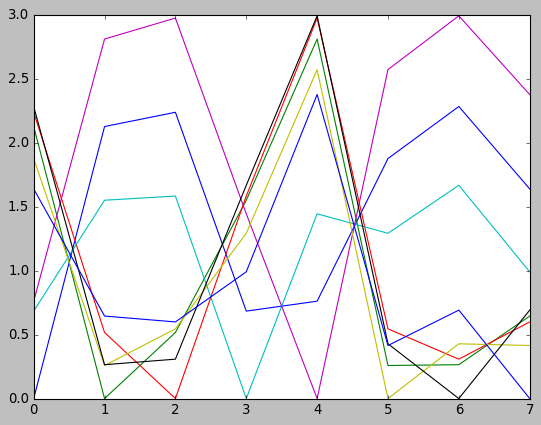

In [170]:
from scipy.spatial.distance import squareform,pdist                                                              
similarities = squareform(pdist(df_lift_value,'euclidean'))
plt.plot(similarities)


In [171]:
import numpy as np
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification

df_lift_value, labels = make_classification()
mds = MDS(n_components=2)

similarities = euclidean_distances(df_lift_value.astype(np.float64))
print (np.abs(similarities - similarities.T).max())
# Prints 1.7763568394e-15
mds.fit(df_lift_value.astype(np.float64))
# Succeeds

similarities = euclidean_distances(df_lift_value.astype(np.float32))
print (np.abs(similarities - similarities.T).max())
# Prints 9.53674e-07
results = mds.fit(df_lift_value.astype(np.float32))

1.7763568394002505e-15
9.536743e-07


In [172]:
import numpy as np
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances
from sklearn.datasets import make_classification

df_lift_value, labels = make_classification()
mds = MDS(n_components=2)

similarities = euclidean_distances(df_lift_value.astype(np.float64))
print (np.abs(similarities - similarities.T).max())
# Prints 1.7763568394e-15
mds.fit(df_lift_value.astype(np.float64))
# Succeeds

similarities = euclidean_distances(df_lift_value.astype(np.float32))
print (np.abs(similarities - similarities.T).max())
# Prints 9.53674e-07
results = mds.fit(df_lift_value.astype(np.float32))

1.7763568394002505e-15
9.536743e-07


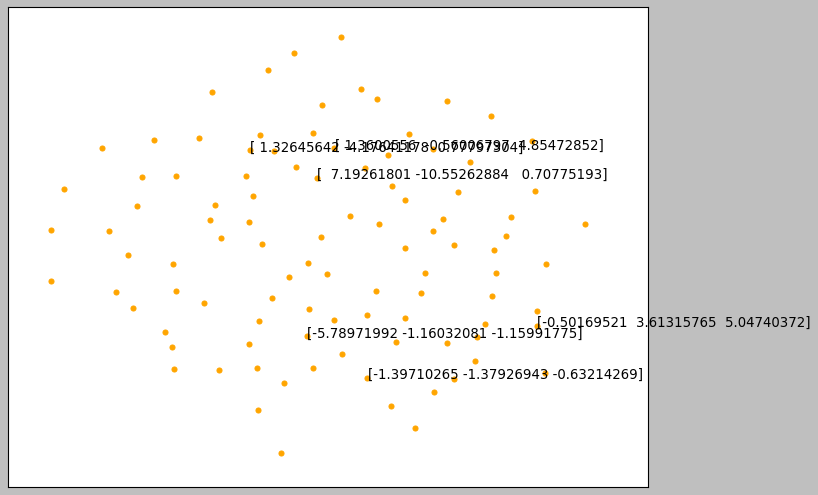

In [173]:
coords=results.embedding_

x=coords[:,0]
y=coords[:,1]

ax=plt.axes([0.,0.,1.,1.])
plt.scatter(x,y,marker='o',color='orange')
mdsdf = df_lift_value[:6,:3]
new = 1/mdsdf
n=list(new)

for i,n in enumerate(n):
    #print(x[i].item())
    #print(n)
    #print(type(y[i]))
    if n=='kia':
        ax.annotate(n,xy=((x[i]+.01),y[i]-.01))
    else:
        ax.annotate(n,xy=((x[i]+.01),y[i]-.02))

plt.xticks([])
plt.yticks([])

plt.show()

#### Categorizing into Big and small Cities

In [184]:
#For some users the location is NaN, so dropping those rows
df_dropped_na = df_tokenizer
    
df_dropped_na.dropna(inplace=True)

In [185]:
df_dropped_na['place'].head()

34    lubbock,Tx
38    Texas, USA
56    Texas, USA
66    Austin, TX
67    Texas, USA
Name: place, dtype: object

In [186]:
location_list = df_dropped_na['place'].values

In [187]:
location_list = df_dropped_na["place"].tolist()
location_list_lower = [location.lower() for location in location_list]
location_list_lower

['lubbock,tx',
 'texas, usa',
 'texas, usa',
 'austin, tx',
 'texas, usa',
 'texas, usa',
 'texas, usa',
 'frisco, tx',
 'deep in the heart of texas!',
 'houston, tx',
 'texas, usa',
 'houston, tx',
 'austin, tx',
 'texas, usa',
 'deep in the ❤ of texas',
 'texas',
 'texas, usa',
 'dallas, tx',
 'texas, usa',
 'dallas, tx',
 'fort worth, tx',
 'austin, tx',
 'austin, texas',
 'el paso, tx',
 'wimberley, texas',
 'longview, tx',
 'san antonio, tx',
 'austin, tx',
 'texas, usa',
 'republic of texas',
 'league city, tx',
 'dfw, texas',
 'waco,tx',
 'texas, usa',
 'lake travis flooding, texas',
 'dallas, tx',
 'dfw, texas',
 'texas',
 'dallas, tx',
 'houston, tx',
 'midland, tx',
 'texas',
 'texas, somehow.',
 'christoval texas, usa',
 'houston, texas',
 'texas, usa',
 'deep in the heart of texas',
 'san antonio, texas',
 'texas, usa',
 'houston, tx',
 'texas, usa',
 'texas, usa',
 'texas, usa 🇺🇸',
 'houston, tx',
 'texas, usa',
 'houston, tx',
 'dallas, tx',
 'austin, texas',
 'texas prai

In [188]:
temp_list=[]
from nltk.tokenize import word_tokenize
for location in location_list_lower:
    work_tokenize_list=word_tokenize(location)
    #print(work_tokenize_list)
    temp_list.append(work_tokenize_list)

In [189]:
index_no = []
count=-1
for x in temp_list:
    count = count+1
    if 'tx' in x or 'texas' in x or 'tex' in x:
        index_no.append(count)


In [190]:
#df_test=[]
df_texas = pd.DataFrame([])
for x in index_no:
    #df_test.append(df_dropped_na.iloc[x,:])
    df_texas = df_texas.append(df_dropped_na.iloc[x,:])

In [191]:
df_texas

,City Type,Location_Text,Unnamed: 0,followers_count,friends_count,full_text,id,place,retweeted,screen_name,verified_user
34,small_city_Texas,rt realdonaldtrump federal judge throws stormy...,34.0,3213.0,4958.0,rt realdonaldtrump federal judge throws stormy...,1.054523e+18,"lubbock,Tx",0.0,aandelectric,0.0
38,small_city_Texas,rt cruz today first day early voting texas fac...,38.0,13148.0,13254.0,rt cruz today first day early voting texas fac...,1.054523e+18,"Texas, USA",0.0,UWS_DWF_USA,0.0
56,small_city_Texas,rt nataliedelc voted betobeto 7am morning soci...,56.0,5843.0,6135.0,rt nataliedelc voted betobeto 7am morning soci...,1.054523e+18,"Texas, USA",0.0,cammonsey,0.0
66,big_city_Texas,rt edespinoza austin texas first day early vot...,66.0,1067.0,707.0,rt edespinoza austin texas first day early vot...,1.054523e+18,"Austin, TX",0.0,I_Am_Grace_,0.0
67,small_city_Texas,rt foxcrime potus holds rally houston texas ht...,67.0,1442.0,1834.0,rt foxcrime potus holds rally houston texas ht...,1.054523e+18,"Texas, USA",0.0,WestHardinFan1,0.0
80,small_city_Texas,rt realdonaldtrump wow thank houston texas sta...,80.0,815.0,1062.0,rt realdonaldtrump wow thank houston texas sta...,1.054523e+18,"Texas, USA",0.0,MAD_4_CRYPTO,0.0
84,small_city_Texas,rt abc goes state affairs inks lake watched en...,84.0,213.0,599.0,rt abc goes state affairs inks lake watched en...,1.054523e+18,"Texas, USA",0.0,PennyPa61597525,0.0
91,small_city_Texas,sunset fiya tonight frisco texas httpstcotugbi...,91.0,89.0,386.0,sunset fiya tonight frisco texas httpstcotugbi...,1.054523e+18,"Frisco, TX",0.0,kcurtisbeck,0.0
92,small_city_Texas,dloesch zero chance leftist fake mexican pushi...,92.0,25.0,18.0,dloesch zero chance leftist fake mexican pushi...,1.054523e+18,Deep in the heart of Texas!,0.0,SP78716144,0.0
106,big_city_Texas,rt realmagasteve thousands president realdonal...,106.0,2656.0,4967.0,rt realmagasteve thousands president realdonal...,1.054523e+18,"Houston, TX",0.0,vealchuc,0.0


In [181]:
df_location = df_texas['place'].values
df_texas["City Type"] = ""



In [192]:
big = []
small = []
i=0
for x in df_location:
    if 'Houston' in x or 'San Antonio' in x or 'Dallas' in x or 'Austin' in x or 'Fort Worth' in x or 'El Paso' in x or 'Arglinton' in x or 'Corpus Christi' in x or 'Plano' in x or 'Laredo' in x:
        big.append(i)
    else:
        small.append(i)
        
    i=i+1
    
i=0
for x in range(len(df_texas)):
    if i in big:
        df_texas.iloc[i,0] = "big_city_Texas"
        
    else:
        df_texas.iloc[i,0] = "small_city_Texas"
    i=i+1

In [193]:
df_texas

,City Type,Location_Text,Unnamed: 0,followers_count,friends_count,full_text,id,place,retweeted,screen_name,verified_user
34,small_city_Texas,rt realdonaldtrump federal judge throws stormy...,34.0,3213.0,4958.0,rt realdonaldtrump federal judge throws stormy...,1.054523e+18,"lubbock,Tx",0.0,aandelectric,0.0
38,small_city_Texas,rt cruz today first day early voting texas fac...,38.0,13148.0,13254.0,rt cruz today first day early voting texas fac...,1.054523e+18,"Texas, USA",0.0,UWS_DWF_USA,0.0
56,small_city_Texas,rt nataliedelc voted betobeto 7am morning soci...,56.0,5843.0,6135.0,rt nataliedelc voted betobeto 7am morning soci...,1.054523e+18,"Texas, USA",0.0,cammonsey,0.0
66,big_city_Texas,rt edespinoza austin texas first day early vot...,66.0,1067.0,707.0,rt edespinoza austin texas first day early vot...,1.054523e+18,"Austin, TX",0.0,I_Am_Grace_,0.0
67,small_city_Texas,rt foxcrime potus holds rally houston texas ht...,67.0,1442.0,1834.0,rt foxcrime potus holds rally houston texas ht...,1.054523e+18,"Texas, USA",0.0,WestHardinFan1,0.0
80,small_city_Texas,rt realdonaldtrump wow thank houston texas sta...,80.0,815.0,1062.0,rt realdonaldtrump wow thank houston texas sta...,1.054523e+18,"Texas, USA",0.0,MAD_4_CRYPTO,0.0
84,small_city_Texas,rt abc goes state affairs inks lake watched en...,84.0,213.0,599.0,rt abc goes state affairs inks lake watched en...,1.054523e+18,"Texas, USA",0.0,PennyPa61597525,0.0
91,small_city_Texas,sunset fiya tonight frisco texas httpstcotugbi...,91.0,89.0,386.0,sunset fiya tonight frisco texas httpstcotugbi...,1.054523e+18,"Frisco, TX",0.0,kcurtisbeck,0.0
92,small_city_Texas,dloesch zero chance leftist fake mexican pushi...,92.0,25.0,18.0,dloesch zero chance leftist fake mexican pushi...,1.054523e+18,Deep in the heart of Texas!,0.0,SP78716144,0.0
106,big_city_Texas,rt realmagasteve thousands president realdonal...,106.0,2656.0,4967.0,rt realmagasteve thousands president realdonal...,1.054523e+18,"Houston, TX",0.0,vealchuc,0.0


In [194]:
df_tokenizer = df_texas

In [195]:

df_tokenizer["Location_Text"] = df_tokenizer["full_text"].map(str) + ' ' + df_tokenizer["City Type"]

## Summary till this point:

We did the following:

* We plotted the MDS Plot by creating the matrix and found that the model predictions was all over the place because of uncertainity around people perception towards either candidate. However they associated very well with the major pain areas and it turned out crime and violence are most talked after topic among users across texas.

* We calculated the eucledian distance beyween each lift value for the dataframe with sentiment analysis and lift value and found them to be closely related proclaiming that there was high association among people talking about concerns and their sentiment towards those topics.

* We divided the whole data according to Big and Small cities based on the locations in the tweets. The big city is divided on the basis of population and top 10 populated cities are selected as Big cities 

# Merging two cells text and location big city or small city

In [81]:
def preprocess(s, lowercase=False):
    #tokens = tokenize(s)
    if lowercase:
        s = [token if emoticon_re.search(token) else token.lower() for token in s]
    return s

In [82]:
from nltk.corpus import stopwords
import string
 
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']


In [83]:
terms_stop = [term for term in preprocess(df_tokenizer['Location_Text']) if term not in stop]

In [84]:
type(terms_stop)

list

In [85]:
beto_freq = 0
cruz_freq = 0
for word in terms_stop:
    if 'beto' in word:
        beto_freq = beto_freq + 1
    if 'cruz' in word:
        cruz_freq = cruz_freq + 1


In [86]:
names_dict_big = {'beto':beto_freq,'cruz':cruz_freq}

In [87]:
names_dict_big

{'beto': 211, 'cruz': 257}

In [88]:
concatlist = list(df_tokenizer["Location_Text"])

In [89]:
concatlist

['rt realdonaldtrump federal judge throws stormy danials lawsuit versus trump trump entitled full legal fees foxcrime great small_city_Texas',
 'rt cruz today first day early voting texas facing fundamental choice state affairs state affairs cruz keept small_city_Texas',
 'rt nataliedelc voted betobeto 7am morning people texas please go vote early election day whatever works small_city_Texas',
 'rt edespinoza austin texas first day early vote 10am surpassed entirety first day early vote 2014 big_city_Texas',
 'rt foxcrime potus holds rally houston texas httpstcomdxvpgv47q httpstco9mkskqp8vy small_city_Texas',
 'rt realdonaldtrump wow thank houston texas state affairs andrews_jba see hours maga httpstcouxzco19 small_city_Texas',
 'rt abc goes state affairs inks lake watched entire dock swept away development texas flooding prompted th small_city_Texas',
 'sunset fiya tonight frisco texas httpstcotugbi6cwdr small_city_Texas',
 'dloesch zero chance leftist fake mexican pushing gun control

In [90]:
names

['beto', 'cruz']

In [91]:
cities_class = ['big_city_Texas','small_city_Texas']

In [92]:

big_small_lift = {}
valuecomb_big ={}
def pair_comb_big(names,cities_class,concatlist):
    
    for i in names:
        for j in cities_class:
            listtweet_new = []
            freq_new = 0
            for k in concatlist:
                if i in k and j in k:
                    freq_new= freq_new+1
                    listtweet_new.append(k)
                      

            valuecomb_big[(i,j)] = freq_new
            big_small_lift[(i,j)] = listtweet_new
print(valuecomb_big)
print(big_small_lift)

{}
{}


In [93]:
pair_comb_big(names,cities_class,concatlist)

In [94]:
tuplebigsmall = tuple(valuecomb_big.items())

In [95]:
big_small_lift

{('beto',
  'big_city_Texas'): ['rt sarabrown28 hi texas friends know things looking hopeful beto really tough race ive phone canv big_city_Texas', 'rt lelianaiover hey texas followers early voting starts today lets get beto httpstconguoetd247 big_city_Texas', 'rt cruz lt law danpatrick telling beto beto democrats turning texas state affairs httpstco5z6n big_city_Texas', 'rt angelinaajewel rt ur texas beto better represents ur values desires ted cruz httpstcojl0vxa7khk big_city_Texas', 'rt betobeto httpstcoyxryfsbuvl big_city_Texas', 'rt nataliedelc voted betobeto 7am morning people texas please go vote early election day whatever works big_city_Texas', 'cruz says betobeto jobs left elizabeth warren left bernie sanders state texas going stand watch trump rally texas courtesy nbcdfw httpstcoc5j7uckzam httpstcoroqbkcsi19 big_city_Texas', 'rt texastribune cruz calls betobeto big lawernment gungrabbin liberal trumps rally houston texas watch ral big_city_Texas', 'ted cruz sure looks pretty

In [96]:
citydict = {'big_city_Texas':len(big),'small_city_Texas':len(small)}

In [97]:
citydict

{'big_city_Texas': 233, 'small_city_Texas': 447}

In [98]:
def get_lift_new(names_dict_big,citydict,tuplebigsmall,No_oftweets):
    
    lift_dict_new = {}
    for k in tuplebigsmall:
       
        if k[0][0] in names_dict_big.keys():
           
            if k[0][1] in citydict.keys():
                
                denom = names_dict_big[k[0][0]] * citydict[k[0][1]]
                
                lift_value_ew = No_oftweets*k[1]/denom
                
                lift_dict_new[k[0]] = lift_value_ew
    return lift_dict_new

In [103]:
# finding lift values for small_big
No_oftweets=670
lift_values_cities = get_lift_new(names_dict_big,citydict,tuplebigsmall,No_oftweets)
print(lift_values_cities)

{('beto', 'big_city_Texas'): 0.9675975835486036, ('beto', 'small_city_Texas'): 0.9945184855328307, ('cruz', 'big_city_Texas'): 1.0405637848399325, ('cruz', 'small_city_Texas'): 0.9564846490655385}


In [196]:
df_lift_value_new = pd.DataFrame(columns=['Lift_Value'])
df_lift_value_new.loc['Beto_Small_city'] =lift_values_cities['beto', 'small_city_Texas']
df_lift_value_new.loc['Beto_Big_city'] =lift_values_cities['beto', 'big_city_Texas']
df_lift_value_new.loc['Cruz_Small_city'] =lift_values_cities['cruz', 'small_city_Texas']
df_lift_value_new.loc['Cruz_Big_city'] =lift_values_cities['cruz', 'big_city_Texas']

df_lift_value_new

# lift_values_cities['beto', 'big_city_Texas']

,Lift_Value
Beto_Small_city,0.994518
Beto_Big_city,0.967598
Cruz_Small_city,0.956485
Cruz_Big_city,1.040564


# Summary till this point:

## Lift values for big and small city

* There was hardly to distinguish here among two candidates however cruz seems to be having a slight advantage in big cities compared to Beto.
* Beto being mum on crime areas might have hurt his chances in small cities as reflected through the sentiment analysis and lif values


# Sentiment Analysis for cities

In [105]:
score_dic_new = {}

for i in big_small_lift.keys():
    counter = 0
    score = 0
    for j in big_small_lift[i]:
        
        counter += 1
        score += sentiment_analyzer_scores(j)
    if counter != 0:
        score_dic_new[i] = score/counter
    else:
        score_dic_new[i] = 1.2
   # if i> 1 

score_dic_new

{('beto', 'big_city_Texas'): 0.20541690140845076,
 ('beto', 'small_city_Texas'): 0.2798614285714283,
 ('cruz', 'big_city_Texas'): 0.23964623655913989,
 ('cruz', 'small_city_Texas'): 0.29496463414634094}

# Dataframe with lift value and sentiment score for cities

In [106]:
df_lift_value_new2 = pd.DataFrame(columns=['Sentiment_Score'])
df_lift_value_new2.loc['Beto_Small_city'] =score_dic_new['beto', 'small_city_Texas']
df_lift_value_new2.loc['Beto_Big_city'] =score_dic_new['beto', 'big_city_Texas']
df_lift_value_new2.loc['Cruz_Small_city'] =score_dic_new['cruz', 'small_city_Texas']
df_lift_value_new2.loc['Cruz_Big_city'] =score_dic_new['cruz', 'big_city_Texas']

df_lift_value_new2

# lift_values_cities['beto', 'big_city_Texas']

,Sentiment_Score
Beto_Small_city,0.279861
Beto_Big_city,0.205417
Cruz_Small_city,0.294965
Cruz_Big_city,0.239646


# Analysis

We found that after collecting just information for users whose location was texas and bifurcating the data into small city and big city that there seems to be divided opinion upon the two candidates. Beto and Cruz would be engaged in a bottleneck competition and the sentiment as well appears to be neutral. 

#Advice to Cruz:

1. Based on sentiment analysis and prevalent issues Beto need to speak strongly on immigration gun measure regularization and have some strong opinion to earn the trust of commoners.
2. One area he is doing better than beto is in terms of mentioning more about jobs and should continue to earn positive response from people.

#Advice to Beto:-
1.  He needs to focus more on job related topics to appear more on pistive note in the eyes of public. Cruz seems to be stealing the show here from Beto by mentioning more and more about jobs.
2.  Beto needs to speak vehemently on crime related stuffs as he has been doing moderately now. His moderate opinions itself are striking chord with public and seems to be giving edge over Cruz. He needs to take it to next level by having some strong opinion on this topic.